[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1QKpmBa4JFyMWr13CHlmhhmWY85h7K7lW?usp=sharing)

# Principal Component Analysis (PCA) - **BASIC**

- 2024 Mathematics for AI
- Instructor: Prof. Jaeyoung Choi
- Teaching Assistant: Jongmoon Ryu
- Contact: 0917jong@gmail.com
- Ref: https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598

## 1. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

## 2. Create data

In [2]:
# Create random 2d data
mu      = np.array([10, 13])
sigma   = np.array([[3.5, -1.8],
                    [-1.8, 3.5]])

print("Mu ",    mu.shape)
print("Sigma ", sigma.shape)

# Create 1000 samples using mean and sigma
org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
print("Data shape ", org_data.shape)

Mu  (2,)
Sigma  (2, 2)
Data shape  (1000, 2)


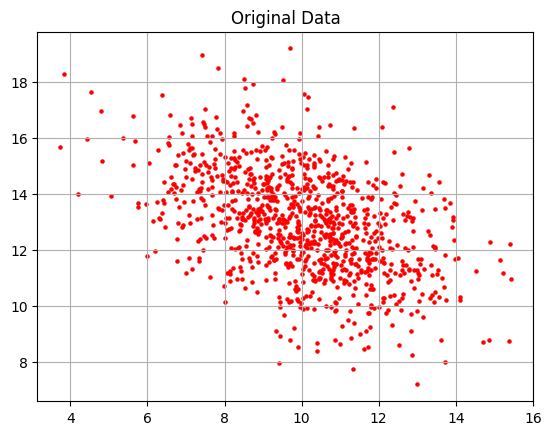

In [3]:
plt.scatter(org_data[:, 0], org_data[:, 1], s=5, color='red')
plt.title("Original Data")
plt.grid()
plt.show()

## 3. Mean centering

In [4]:
# Subtract mean from data
mean = np.mean(org_data, axis= 0)
print("Mean ", mean.shape)
mean_data = org_data - mean
print("Data after subtracting mean ", org_data.shape, "\n")

Mean  (2,)
Data after subtracting mean  (1000, 2) 



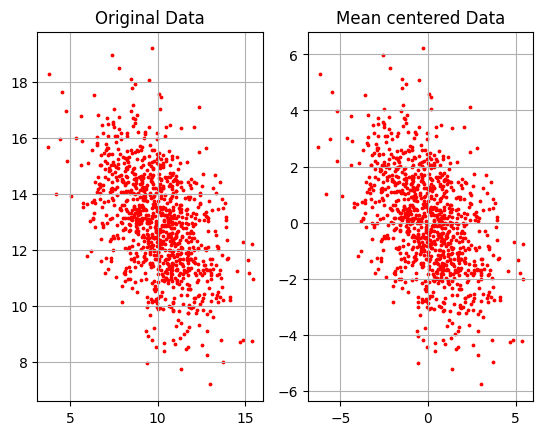

In [5]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(org_data[:, 0], org_data[:, 1], s=3, color='red')
ax[0].set_title("Original Data")
ax[0].grid(True)

ax[1].scatter(mean_data[:, 0], mean_data[:, 1], s=3, color='red')
ax[1].set_title("Mean centered Data")
ax[1].grid(True)

plt.show()

## 4. Compute covariance matrix

- https://angeloyeo.github.io/p5/2019-07-27-PCA_applet1/

In [6]:
# Compute covariance matrix
cov = np.cov(mean_data.T)
# cov = np.round(cov, 2)
print("Covariance matrix ", cov.shape, "\n")
print(cov)

Covariance matrix  (2, 2) 

[[ 3.52899385 -1.6358471 ]
 [-1.6358471   3.41769598]]


## 5. Perform eigen decomposition of covariance matrix

$ \mathbf{A} \mathbf{x} = \lambda \mathbf{x} $

**With covariance matrix,**

- eigen vector
  - The principal axes through which a matrix acts on a vector = the directions in which data is dispersed.  
  - 행렬이 벡터의 변화에 작용하는 주축 = 데이터가 어떤 방향으로 분산되어 있는지
- eigen value
  - The magnitude by which the vector space is stretched along the direction of eigenvectors.
  - 고유벡터 방향으로 얼마만큼의 크기로 벡터 공간이 늘려지는지

In [7]:
# Perform eigen decomposition of covariance matrix
eig_val, eig_vec = np.linalg.eig(cov)
print("Eigen vectors\n", eig_vec)
print("Eigen values\n", eig_val, "\n")

Eigen vectors
 [[ 0.71902669  0.69498246]
 [-0.69498246  0.71902669]]
Eigen values
 [5.11013828 1.83655155] 



## 6. Sort eigen vectors in descending order

In [8]:
# Sort eigen values and corresponding eigen vectors in descending order
indices = np.arange(0, len(eig_val), 1)
indices = ([x for _, x in sorted(zip(eig_val, indices))])[::-1]     # can also use argsort()[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:, indices]
print("Sorted Eigen vectors ", eig_vec)
print("Sorted Eigen values ", eig_val, "\n")

Sorted Eigen vectors  [[ 0.71902669  0.69498246]
 [-0.69498246  0.71902669]]
Sorted Eigen values  [5.11013828 1.83655155] 



## 7. Compute explained variance and select N components
- Typically, the dimensionality reduction size is chosen at the point where the cumulative variance reaches `0.95`.

In [9]:
# Get explained variance
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val / sum_eig_val
print(explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.73562206 0.26437794]
[0.73562206 1.        ]


# 8. Project data

In [10]:
# Take transpose of eigen vectors with data
pca_data = np.dot(mean_data, eig_vec)
print("Transformed data ", pca_data.shape)

Transformed data  (1000, 2)


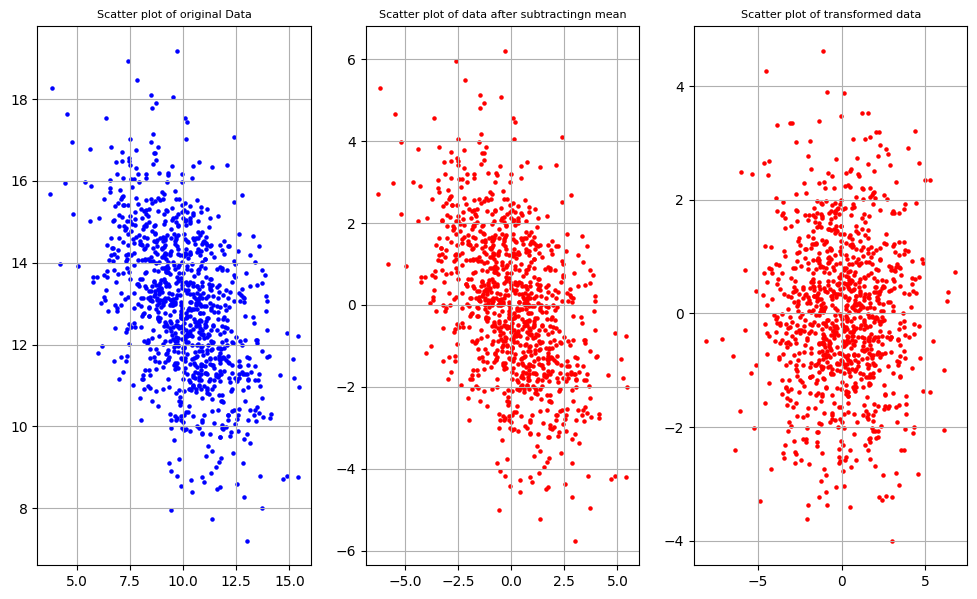

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12, 7))
ax[0].scatter(org_data[:, 0], org_data[:, 1], s=5, color='blue')
ax[0].set_title("Scatter plot of original Data", fontsize=8)
ax[0].grid(True)

ax[1].scatter(mean_data[:, 0], mean_data[:, 1], s=5, color='red')
ax[1].set_title("Scatter plot of data after subtractingn mean", fontsize=8)
ax[1].grid(True)

ax[2].scatter(pca_data[:, 0], pca_data[:, 1], s=5, color='red')
ax[2].set_title("Scatter plot of transformed data", fontsize=8)
ax[2].grid(True)
plt.show()

## 9. Invert PCA / Reconstruct data from N components

- When matrix $\mathbf{P}$ is orthogonal matrix then $\mathbf{P}^{-1} = \mathbf{P}$.
- Projection(Transformation): $\mathbf{Y} = \mathbf{X}\mathbf{P}$
- Reconstruction: $\mathbf{Y}\mathbf{P}^{-1}=\mathbf{X}\mathbf{P}\mathbf{P}^{-1}=\mathbf{X}\mathbf{I}$

In [12]:
recon_data = pca_data.dot(eig_vec.T) + mean
print(recon_data.shape)

(1000, 2)


In [13]:
PinvP = np.linalg.inv(eig_vec) @ eig_vec
PtrsP = eig_vec.T @ eig_vec

print('P-inv @ P:\n', np.round(PinvP, 2))
print('P-transpose @ P\n', np.round(PtrsP, 2))

P-inv @ P:
 [[ 1. -0.]
 [-0.  1.]]
P-transpose @ P
 [[ 1. -0.]
 [-0.  1.]]


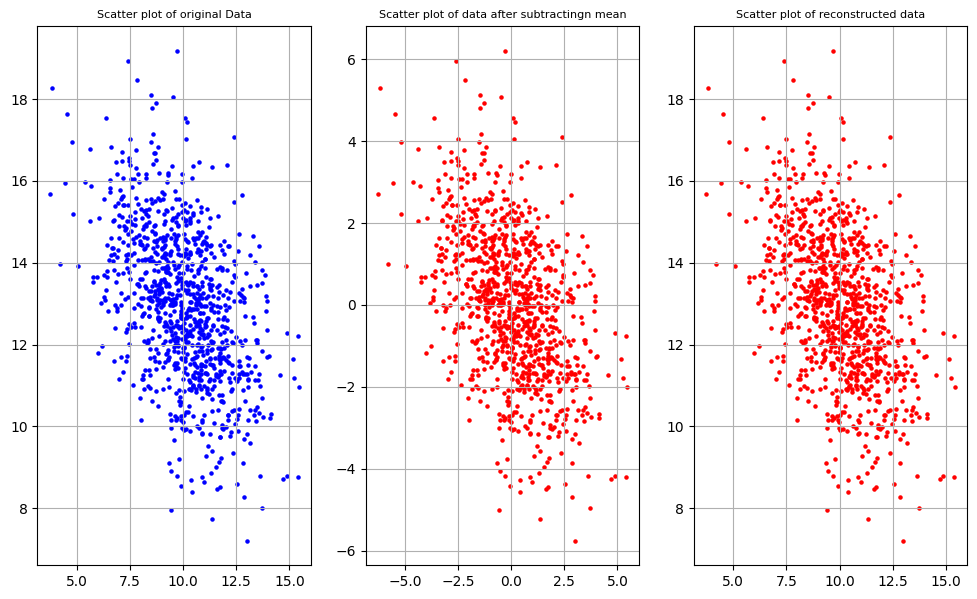

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(12, 7))
ax[0].scatter(org_data[:, 0], org_data[:, 1], s=5, color='blue')
ax[0].set_title("Scatter plot of original Data", fontsize=8)
ax[0].grid(True)

ax[1].scatter(mean_data[:, 0], mean_data[:, 1], s=5, color='red')
ax[1].set_title("Scatter plot of data after subtractingn mean", fontsize=8)
ax[1].grid(True)

ax[2].scatter(recon_data[:, 0], recon_data[:, 1], s=5, color='red')
ax[2].set_title("Scatter plot of reconstructed data", fontsize=8)
ax[2].grid(True)
plt.show()

## 10. Reconstruction loss

In [15]:
loss = np.mean(np.square(recon_data - org_data))
print("Reconstruction loss ", loss)

Reconstruction loss  5.1275958839365765e-33
